## Recommendation System

### Objective:

##### The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset. 

### Data Preprocessing:

##### Load the dataset into a suitable data structure (e.g., pandas DataFrame).
##### Handle missing values, if any.
##### Explore the dataset to understand its structure and attributes.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity,sigmoid_kernel

In [2]:
df=pd.read_csv('anime.csv')

In [3]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df.shape

(12294, 7)

In [5]:
### checking missing values
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [94]:
df.isnull().sum().sum()/len(df)*100

2.5784935741011874

In [6]:
df['genre']=df['genre'].fillna('')
df['type'] = df['type'].fillna(0)
df['rating'] = df['rating'].fillna(0)
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [10]:
df.drop(columns=['anime_id'],axis=1,inplace=True)

In [12]:
df.head()

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [15]:
df.nunique()

name        12292
genre        3265
type            7
episodes      187
rating        599
members      6706
dtype: int64

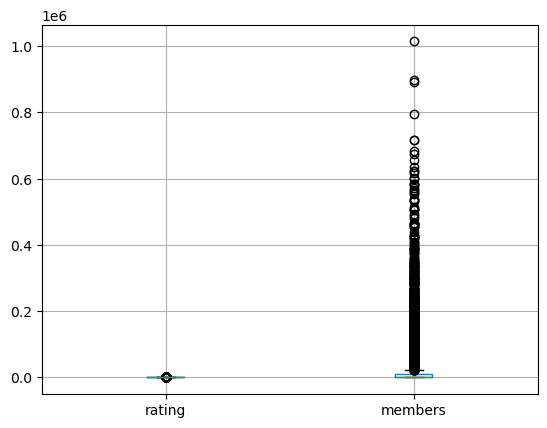

In [16]:
df.boxplot()
plt.show()

In [17]:
### outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25) #It finds the value at the given percentile in the data. Q1=25%
    Q3=df[column].quantile(0.75) #Q3 = 75%
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)
# Each and every column is selected and done outlier capping

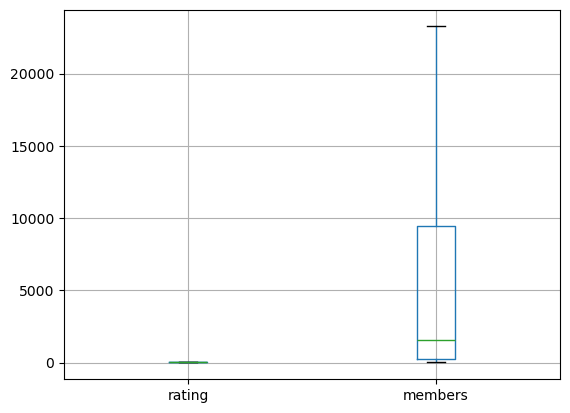

In [18]:
df.boxplot()
plt.show()

In [19]:
df.describe()

,rating,members
count,12294.000000,12294.000000
mean,6.429492,6272.463315
std,1.062938,8570.835037
min,3.795000,5.000000
25%,5.820000,225.000000
50%,6.550000,1550.000000
75%,7.170000,9437.000000
max,9.195000,23255.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      12294 non-null  object 
 1   genre     12294 non-null  object 
 2   type      12294 non-null  object 
 3   episodes  12294 non-null  object 
 4   rating    12294 non-null  float64
 5   members   12294 non-null  float64
dtypes: float64(2), object(4)
memory usage: 576.4+ KB


In [21]:
df.genre

0                     Drama, Romance, School, Supernatural
1        Action, Adventure, Drama, Fantasy, Magic, Mili...
2        Action, Comedy, Historical, Parody, Samurai, S...
3                                         Sci-Fi, Thriller
4        Action, Comedy, Historical, Parody, Samurai, S...
                               ...                        
12289                                               Hentai
12290                                               Hentai
12291                                               Hentai
12292                                               Hentai
12293                                               Hentai
Name: genre, Length: 12294, dtype: object

### Feature Extraction:

##### Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
##### Convert categorical features into numerical representations if necessary.
##### Normalize numerical features if required.


In [42]:
### genre,user ratings, type are key to recommend movies based on similarity

In [31]:
min_max_sca=MinMaxScaler()

In [30]:
numerical_cols=['rating','members']

In [32]:
df[numerical_cols]=min_max_sca.fit_transform(df[numerical_cols])

In [33]:
df.head()

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,1.000000,1.0
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,1.000000,1.0
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,1.000000,1.0
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,0.995370,1.0
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,0.993519,1.0


In [39]:
## The non numeric columns need not to be converted to numeric columns

### Recommendation System:

##### Design a function to recommend anime based on cosine similarity.
##### Given a target anime, recommend a list of similar anime based on cosine similarity scores.
##### Experiment with different threshold values for similarity scores to adjust the recommendation list size.
##### Analyze the performance of the recommendation system and identify areas of improvement.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tfidf=TfidfVectorizer(stop_words='english')

In [24]:
tfidf1=tfidf.fit_transform(df.genre)

In [25]:
print(tfidf1.shape)

(12294, 46)


In [26]:
tfidf1

<12294x46 sparse matrix of type '<class 'numpy.float64'>'
	with 40418 stored elements in Compressed Sparse Row format>

In [35]:
similarity=cosine_similarity(tfidf1)
similarity

array([[1.        , 0.14784981, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14784981, 1.        , 0.1786367 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.1786367 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [36]:
similarity.shape

(12294, 12294)

In [127]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,0.000000,1.0,1.0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,1.000000,1.0,1.0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,1.000000,1.0,1.0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,0.836364,1.0,1.0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,1.000000,1.0,1.0


In [52]:
indices=pd.Series(data=df.index,index=df.name)

In [53]:
indices

name
Kimi no Na wa.                                            0
Fullmetal Alchemist: Brotherhood                          1
Gintama°                                                  2
Steins;Gate                                               3
Gintama&#039;                                             4
                                                      ...  
Toushindai My Lover: Minami tai Mecha-Minami          12289
Under World                                           12290
Violence Gekiga David no Hoshi                        12291
Violence Gekiga Shin David no Hoshi: Inma Densetsu    12292
Yasuji no Pornorama: Yacchimae!!                      12293
Length: 12294, dtype: int64

In [59]:
def recommended_anime(similar_anime):
    if similar_anime in indices.index:
        index= np.where(similar_anime==indices.index)[0][0]
        similar=sorted(list(enumerate(similarity[index])),reverse=True,key=lambda x: x[1])[1:6]
        print(f'Recommended anime of {similar_anime}')
        print('*'*30)
        for anime in similar:
            print(indices.index[anime[0]])
    else:
        print('Movie is not in the list')

In [60]:
 recommended_anime('Kimi no Na wa.')

Recommended anime of Kimi no Na wa.
******************************
Wind: A Breath of Heart OVA
Wind: A Breath of Heart (TV)
Aura: Maryuuin Kouga Saigo no Tatakai
Angel Beats!: Another Epilogue
Harmonie


In [61]:
def recommended_anime(similar_anime, threshold=0.5):
    if similar_anime in indices.index:
        idx = np.where(similar_anime == indices.index)[0][0]
        sim_scores = list(enumerate(similarity[idx]))
        filtered = [(i, score) for i, score in sim_scores if score >= threshold and i != idx]
        filtered = sorted(filtered, key=lambda x: x[1], reverse=True)
        if len(filtered) == 0:
            print(f"No anime found above threshold {threshold}")
            return
        
        print(f"Recommended anime for '{similar_anime}' (Threshold={threshold})")
        print('*' * 40)
        for anime_idx, score in filtered:
            print(f"{indices.index[anime_idx]} ---> Similarity Score: {score:.2f}")
    else:
        print(f"'{similar_anime}' is not in the list")

In [62]:
recommended_anime("Naruto", threshold=0.4)

Recommended anime for 'Naruto' (Threshold=0.4)
****************************************
Boruto: Naruto the Movie ---> Similarity Score: 1.00
Naruto: Shippuuden ---> Similarity Score: 1.00
Boruto: Naruto the Movie - Naruto ga Hokage ni Natta Hi ---> Similarity Score: 1.00
Naruto x UT ---> Similarity Score: 1.00
Naruto: Shippuuden Movie 4 - The Lost Tower ---> Similarity Score: 1.00
Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono ---> Similarity Score: 1.00
Naruto Shippuuden: Sunny Side Battle ---> Similarity Score: 1.00
Naruto Soyokazeden Movie: Naruto to Mashin to Mitsu no Onegai Dattebayo!! ---> Similarity Score: 1.00
Kyutai Panic Adventure! ---> Similarity Score: 0.98
Naruto: Shippuuden Movie 6 - Road to Ninja ---> Similarity Score: 0.95
Rekka no Honoo ---> Similarity Score: 0.95
Naruto: Honoo no Chuunin Shiken! Naruto vs. Konohamaru!! ---> Similarity Score: 0.95
Street Fighter Zero The Animation ---> Similarity Score: 0.94
Dragon Ball Z ---> Similarity Score: 0.94
Dragon Ball 

In [64]:
recommended_anime("Naruto", threshold=0.9)

Recommended anime for 'Naruto' (Threshold=0.9)
****************************************
Boruto: Naruto the Movie ---> Similarity Score: 1.00
Naruto: Shippuuden ---> Similarity Score: 1.00
Boruto: Naruto the Movie - Naruto ga Hokage ni Natta Hi ---> Similarity Score: 1.00
Naruto x UT ---> Similarity Score: 1.00
Naruto: Shippuuden Movie 4 - The Lost Tower ---> Similarity Score: 1.00
Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono ---> Similarity Score: 1.00
Naruto Shippuuden: Sunny Side Battle ---> Similarity Score: 1.00
Naruto Soyokazeden Movie: Naruto to Mashin to Mitsu no Onegai Dattebayo!! ---> Similarity Score: 1.00
Kyutai Panic Adventure! ---> Similarity Score: 0.98
Naruto: Shippuuden Movie 6 - Road to Ninja ---> Similarity Score: 0.95
Rekka no Honoo ---> Similarity Score: 0.95
Naruto: Honoo no Chuunin Shiken! Naruto vs. Konohamaru!! ---> Similarity Score: 0.95
Street Fighter Zero The Animation ---> Similarity Score: 0.94
Dragon Ball Z ---> Similarity Score: 0.94
Dragon Ball 

In [65]:
target = "Naruto"
recs = recommended_anime(target, threshold=0.4)

Recommended anime for 'Naruto' (Threshold=0.4)
****************************************
Boruto: Naruto the Movie ---> Similarity Score: 1.00
Naruto: Shippuuden ---> Similarity Score: 1.00
Boruto: Naruto the Movie - Naruto ga Hokage ni Natta Hi ---> Similarity Score: 1.00
Naruto x UT ---> Similarity Score: 1.00
Naruto: Shippuuden Movie 4 - The Lost Tower ---> Similarity Score: 1.00
Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono ---> Similarity Score: 1.00
Naruto Shippuuden: Sunny Side Battle ---> Similarity Score: 1.00
Naruto Soyokazeden Movie: Naruto to Mashin to Mitsu no Onegai Dattebayo!! ---> Similarity Score: 1.00
Kyutai Panic Adventure! ---> Similarity Score: 0.98
Naruto: Shippuuden Movie 6 - Road to Ninja ---> Similarity Score: 0.95
Rekka no Honoo ---> Similarity Score: 0.95
Naruto: Honoo no Chuunin Shiken! Naruto vs. Konohamaru!! ---> Similarity Score: 0.95
Street Fighter Zero The Animation ---> Similarity Score: 0.94
Dragon Ball Z ---> Similarity Score: 0.94
Dragon Ball 

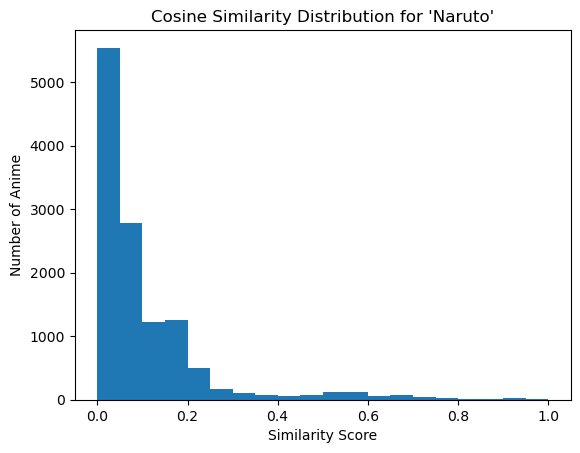

In [66]:
import matplotlib.pyplot as plt
import numpy as np

idx = np.where(target == indices.index)[0][0]
scores = similarity[idx]

plt.hist(scores, bins=20)
plt.title(f"Cosine Similarity Distribution for '{target}'")
plt.xlabel("Similarity Score")
plt.ylabel("Number of Anime")
plt.show()

In [67]:
### if threshold is 0.2 -- 	Many recommendations (low similarity)
### if threshold is 0.4 -- 	Moderate no of recommendations
### if threshold is 0.6	-- Few	no of recommendations
### if threshold is 0.8	-- 1-2	 recommendations

### Interview Questions:

##### 1. Can you explain the difference between user-based and item-based collaborative filtering?

##### 2. What is collaborative filtering, and how does it work?